In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

from imp import reload
from IPython.display import SVG
from IPython.display import Image
import itertools
from __future__ import print_function

print(tf.__version__)
print(np.__version__)
print(keras.__version__)

1.12.0
1.14.3
2.1.6-tf


In [41]:
imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [42]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen = 300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen = 300)

print("Train Data Size",x_train.shape)
print("Test Data Size",x_test.shape)

Train Data Size (25000, 300)
Test Data Size (25000, 300)


In [84]:
vocab_size = 5000
embedding_size = 50

filters = 250
kernal_size = 3

hidden_dims = 250

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,50,input_length=300))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv1D(filters,kernal_size,padding='valid',activation='relu',strides=1))
model.add(keras.layers.GlobalMaxPooling1D())

model.add(keras.layers.Dense(hidden_dims))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Activation('tanh'))

model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 50)           250000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300, 50)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 298, 250)          37750     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 250)               0         
__________

In [85]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [86]:
batch_size = 64
epochs = 4

history = model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_test,y_test),
         verbose=1)

/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 96s 4ms/step - loss: 0.4292 - acc: 0.7844 - val_loss: 0.2823 - val_acc: 0.8814
Epoch 2/4
25000/25000 [==============================] - 96s 4ms/step - loss: 0.2364 - acc: 0.9029 - val_loss: 0.2594 - val_acc: 0.8925
Epoch 3/4
25000/25000 [==============================] - 94s 4ms/step - loss: 0.1634 - acc: 0.9379 - val_loss: 0.3512 - val_acc: 0.8640
Epoch 4/4
25000/25000 [==============================] - 94s 4ms/step - loss: 0.1114 - acc: 0.9590 - val_loss: 0.3444 - val_acc: 0.8796


In [87]:
score,acc_test = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Score:",score,"Accuracy:",acc_test)

25000/25000 [==============================] - 10s 412us/step
Score: 0.3443670129299164 Accuracy: 0.8796400000190735


In [88]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

range(1, 5)


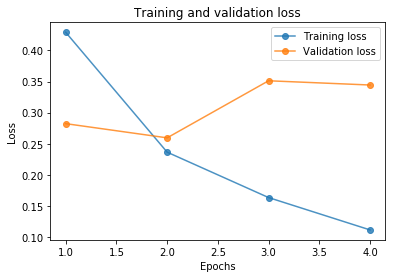

In [89]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
print(epochs)

plt.plot(epochs, loss, marker='o', alpha=0.8, label='Training loss')
plt.plot(epochs, val_loss, marker='o', alpha=0.8, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

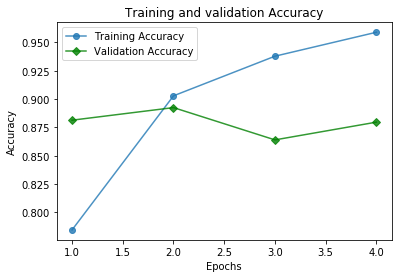

In [90]:

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, marker='o', alpha=0.8, label='Training Accuracy')
plt.plot(epochs, val_acc, marker='D', color='green',alpha=0.8, label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [91]:
word_index = imdb.get_word_index()

word_index = {k: v+3 for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(key,value) for (value,key) in word_index.items()])

def get_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [203]:
#I do like to recommend this movie
#Dogs do not like to chase cats
#You are not going to sanjose
#A Summer Film That Is Better Than The Hype
string ="A Summer Film That Is Better Than The Hype"


In [204]:
string_list = string.split(None)
custom_review = np.zeros(300)
custom_review[0] = 1
for i in range(len(string_list)):
    if string_list[i] in word_index :
        custom_review[i+1] = word_index[string_list[i]]
    else:
        custom_review[i] = 2
prediction_result = model.predict_classes([[custom_review]])
#print(custom_review)
if (prediction_result == 1):
    print("Result=",prediction_result,": Positive")
    print('')
else:
    print("Result=",prediction_result,": Negative")
    print('')


Result= [[1]] : Positive

